In [198]:
import torch
import pandas as pd
from   sklearn.datasets import load_breast_cancer
from   sklearn.metrics import *
import matplotlib.pyplot as plt

In [199]:
import time
import numpy as np
def printing_(enum_, length_train, loss, sleep=0.1):
    progress_ = enum_ / length_train

    print(  f"\rBatch {enum_}/{length_train} "
            f"[{int(progress_ * 30) * '='}>{int((1 - progress_) * 30) * ' '}] "
            f"{progress_ * 100:.2f}% - loss: {loss:.4f}", end="")
    time.sleep(sleep)
    
def final_epoch(l_loss):
    print()
    print(f'    > loss_mean:{np.mean(l_loss):2f}')

In [200]:
X, y = load_breast_cancer(return_X_y=True)

In [201]:
X[0, :]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [202]:
abs(pd.DataFrame(X).corrwith(pd.Series(y))).sort_values()

18    0.006522
11    0.008303
9     0.012838
14    0.067016
19    0.077972
16    0.253730
15    0.292999
29    0.323872
8     0.330499
4     0.358560
17    0.408042
1     0.415185
28    0.416294
24    0.421465
21    0.456903
13    0.548236
12    0.556141
10    0.567134
25    0.590998
5     0.596534
26    0.659610
6     0.696360
3     0.708984
0     0.730029
23    0.733825
2     0.742636
20    0.776454
7     0.776614
22    0.782914
27    0.793566
dtype: float64

modelo_1

In [203]:
from torch.nn import functional as f 
class modelo_1(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.input_ = torch.nn.Linear(30, 15)
        self.hidden1_ = torch.nn.Linear(15, 5)
        self.hidden2_ = torch.nn.Linear(5, 1)
    
    def forward(self, x):
        x = self.input_(x)
        x = torch.nn.Sigmoid()(x)
        x = self.hidden1_(x)
        x = torch.nn.Sigmoid()(x)
        x = self.hidden2_(x)
        return torch.nn.Sigmoid()(x)

In [204]:
modelo_1 = modelo_1()

In [205]:
modelo_1.input_.weight[0, :]

tensor([-0.1664,  0.0039, -0.1409, -0.0465, -0.1256,  0.0253,  0.0003, -0.1629,
        -0.1068,  0.0680, -0.0434, -0.0979, -0.1311, -0.1156,  0.1626, -0.1198,
        -0.0040,  0.1324, -0.0570, -0.0083, -0.0984,  0.1204, -0.0342, -0.0341,
         0.0237,  0.1147,  0.0045,  0.1507,  0.0329,  0.1755],
       grad_fn=<SliceBackward0>)

In [206]:
def initializer_(x:torch.nn.Linear):
    if isinstance(x, torch.nn.Linear):
        torch.nn.init.xavier_uniform_(x.weight)

modelo_1.apply(initializer_)

modelo_1(
  (input_): Linear(in_features=30, out_features=15, bias=True)
  (hidden1_): Linear(in_features=15, out_features=5, bias=True)
  (hidden2_): Linear(in_features=5, out_features=1, bias=True)
)

In [207]:
modelo_1.input_.weight[0, :]

tensor([-0.3512,  0.0244,  0.1400,  0.2943,  0.1096,  0.3357, -0.3097,  0.2440,
        -0.2671,  0.2329,  0.1643,  0.1215, -0.3125,  0.2276, -0.1641,  0.1419,
        -0.2040,  0.0429,  0.2663, -0.2349,  0.1156, -0.1832,  0.0699, -0.3066,
        -0.0974, -0.3409,  0.2393,  0.1461, -0.1357, -0.2567],
       grad_fn=<SliceBackward0>)

modelo 2

In [234]:
modelo_2 = torch.nn.Sequential(
    torch.nn.Linear(30, 10),
    torch.nn.LeakyReLU(),   
    torch.nn.Dropout(p=0.25),
    torch.nn.Linear(10, 5),
    torch.nn.LeakyReLU(),
    
    torch.nn.Linear(5, 1),
    torch.nn.LeakyReLU(),
)
modelo_2

Sequential(
  (0): Linear(in_features=30, out_features=10, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Dropout(p=0.25, inplace=False)
  (3): Linear(in_features=10, out_features=5, bias=True)
  (4): LeakyReLU(negative_slope=0.01)
  (5): Linear(in_features=5, out_features=1, bias=True)
  (6): LeakyReLU(negative_slope=0.01)
)

In [235]:
modelo_2[0].weight[0, :]

tensor([ 0.1653,  0.1354, -0.0386, -0.1323, -0.1053, -0.1213,  0.0781, -0.0901,
         0.0936,  0.1521,  0.1057,  0.1691,  0.0075, -0.1370,  0.1216,  0.1103,
        -0.1157,  0.1475, -0.0008, -0.0043, -0.0393, -0.0598,  0.0815, -0.1741,
         0.0247,  0.1294, -0.0724,  0.0211,  0.1743,  0.1189],
       grad_fn=<SliceBackward0>)

In [236]:
def initializer_(x:torch.nn.Linear):
    if isinstance(x, torch.nn.Linear):
        return torch.nn.init.xavier_uniform_(x.weight, gain=torch.nn.init.calculate_gain('Leaky_ReLU'.lower()))
modelo_2.apply(initializer_)

Sequential(
  (0): Linear(in_features=30, out_features=10, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Dropout(p=0.25, inplace=False)
  (3): Linear(in_features=10, out_features=5, bias=True)
  (4): LeakyReLU(negative_slope=0.01)
  (5): Linear(in_features=5, out_features=1, bias=True)
  (6): LeakyReLU(negative_slope=0.01)
)

In [237]:
modelo_2[0].weight[0, :]

tensor([ 0.1592,  0.1623, -0.4387,  0.4541, -0.5123, -0.1166, -0.2477,  0.3059,
        -0.2484,  0.2582, -0.5359, -0.0314,  0.0377,  0.0462, -0.5205, -0.1896,
        -0.1129, -0.1361, -0.1182, -0.0785,  0.3435,  0.1555, -0.3837, -0.0170,
         0.1924,  0.1513, -0.2594,  0.2823,  0.4117, -0.0341],
       grad_fn=<SliceBackward0>)

In [238]:
X_ = torch.tensor(X, dtype=torch.float32)
y_ = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

In [239]:
X_ = (X_ - X_.mean(dim=0)) / X_.std(dim=0)

In [240]:
X_.shape[0] /20

28.45

In [241]:
train = torch.utils.data.TensorDataset(X_, y_)
train = torch.utils.data.DataLoader(
    dataset = train, batch_size=20, shuffle=True, drop_last=True
)

In [254]:
import torch.optim.sparse_adam


accuracy_ = []
loss_     = []
loss_fn   = torch.nn.BCEWithLogitsLoss()
optimzer  = torch.optim.SGD(
    modelo_2.parameters(), lr=0.001, nesterov=True, momentum=0.50)


for epoch in range(100):
    list_accuracy, list_loss = [], []

    for enum_, (xbatch, ybatch) in enumerate(train, 1):
        pred = modelo_2(xbatch)
    
        loss = loss_fn(ybatch, pred)

        list_accuracy.append(
            accuracy_score(ybatch, (pred >=0.5).float())
        )
        list_loss.append(
            loss.item()
        )

        optimzer.zero_grad()
        loss.backward()
        optimzer.step()

    accuracy_.append(np.mean(list_accuracy))
    loss_.append(np.mean(list_loss))

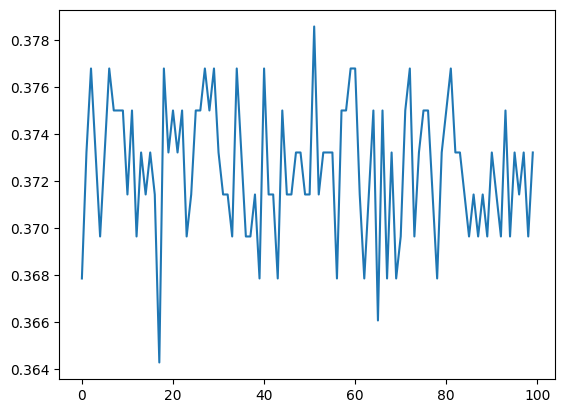

In [255]:
plt.plot(accuracy_)

In [256]:
np.unique((modelo_2(X_) >=0.5).float())

array([0.], dtype=float32)

In [245]:
print(classification_report(
    y_, (modelo_2(X_) >=0.5).float().detach()
))

              precision    recall  f1-score   support

         0.0       0.78      0.27      0.41       212
         1.0       0.69      0.96      0.80       357

    accuracy                           0.70       569
   macro avg       0.74      0.61      0.60       569
weighted avg       0.72      0.70      0.65       569



contador

### criando modelos do zero

In [220]:
def sigmoid(x):
    return 1 / ( 1 + torch.exp(-1*x))

In [221]:
weight = torch.randn(X.shape[1])
weight.requires_grad_()

bias   = torch.zeros(1, requires_grad=True)

def modelo(X):
    p_ = weight.add( other=bias ).reshape(-1, 1)

    return X @ p_

In [222]:
def loss_fn(input_:torch.Tensor, output_:torch.Tensor):
    return (
        torch.multiply( (-1 * input_), torch.log(output_) ) 
        - torch.multiply(( 1 - input_ ) , torch.log( 1 + output_ ))
    ).mean()

In [223]:
X_ = torch.tensor(X, dtype=torch.float32)
y_ = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

In [224]:
X_ = (X_ - X_.mean(dim=0)) / X_.std(dim=0)

In [225]:
train = torch.utils.data.TensorDataset(X_, y_)
train = torch.utils.data.DataLoader(
    dataset = train, batch_size=32, shuffle=True
)

In [226]:
accuracy_ = []
loss_     = []
for epoch in range(10):
    list_accuracy, list_loss = [], []

    for enum_, (xbatch, ybatch) in enumerate(train, 1):
        pred = sigmoid( modelo(xbatch) )
    
        loss = loss_fn(ybatch, pred)
        loss.backward()

        list_accuracy.append(
            accuracy_score(ybatch, (pred >=0.5).float())
        )
        list_loss.append(
            loss.item()
        )

       

        with torch.no_grad():
            weight -= weight.grad * 0.01
            bias   -= bias.grad * 0.01

            weight.grad.zero_()
            bias.grad.zero_()
    accuracy_.append(np.mean(list_accuracy))
    loss_.append(np.mean(list_loss))

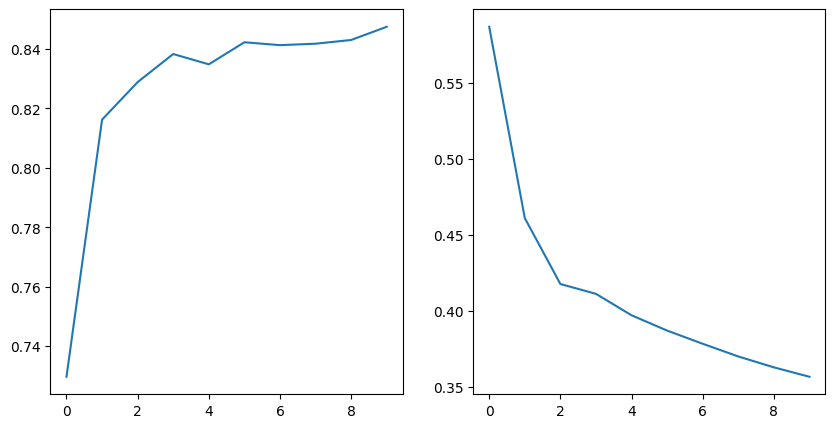

In [227]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(accuracy_)
ax[1].plot(loss_)

In [228]:
with torch.no_grad():
    pred = modelo(X_)

In [229]:
print(classification_report((pred > 0.05).float(), y_))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       217
         1.0       0.87      0.88      0.88       352

    accuracy                           0.85       569
   macro avg       0.84      0.84      0.84       569
weighted avg       0.85      0.85      0.85       569



In [230]:
confusion_matrix((pred > 0.05).float(), y_)

array([[171,  46],
       [ 41, 311]], dtype=int64)